
image 1/1 /home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/tmp.jpg: 384x640 1 object_4804-0, 2 object_4808-0s, 1 object_4810-0, 2 object_4812-0s, 3 object_4814-0s, 2 object_4815-0s, 1 object_4818-0, 1 object_7, 53.8ms
Speed: 2.9ms preprocess, 53.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
1
probs ultralytics.engine.results.Boxes object with attributes:

cls: tensor([13., 11.,  3., 11.,  7.,  9.,  5., 10., 14.,  5., 10.,  9., 10.], device='cuda:0')
conf: tensor([0.8881, 0.8727, 0.7644, 0.7014, 0.6447, 0.6367, 0.6115, 0.5791, 0.4232, 0.4035, 0.3956, 0.3906, 0.2534], device='cuda:0')
data: tensor([[9.4607e+01, 1.7780e+02, 1.7651e+02, 2.9530e+02, 8.8805e-01, 1.3000e+01],
        [6.0357e+02, 5.7499e+02, 7.8748e+02, 7.0873e+02, 8.7273e-01, 1.1000e+01],
        [2.5155e+02, 5.1757e+02, 3.6221e+02, 6.5347e+02, 7.6442e-01, 3.0000e+00],
        [1.5626e+02, 6.1920e+02, 3.5878e+02, 7.0711e+02, 7.0138e-01, 1.1000e+01],
        [8.8410e+02, 5.3745e+02, 1.0

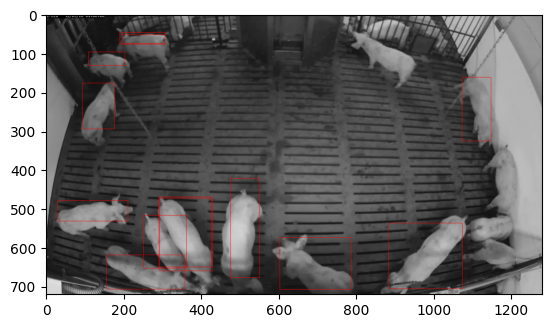

In [1]:
import os
import cv2
import xml.etree.ElementTree as ET
import json
from ultralytics import YOLO
from matplotlib import pyplot as plt

video_path="/home/sophie/uncertain-identity-aware-tracking/Bytetrack/videos/GR77_20200512_111314.mp4"
model = YOLO('/home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/best.pt')  # load a pretrained model (recommended for training)

# Load your model
# Read video frames and create annotations
cap = cv2.VideoCapture(video_path)
frame_id = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Run detection
    cv2.imwrite('tmp.jpg', frame)
    results = model('tmp.jpg')  # predict on an image
    print(len(results))
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        print('probs', boxes)
        for idx, cl in enumerate(boxes.cls):
            box = boxes.xyxy[idx]
            cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255,0,0), 1)

        break
    plt.imshow(frame)
    plt.show()
    
    """
    pour chaque frame result 
        par detection partage comme avec le feeder, 
        ajouter aux observations
    """
    break
    if frame_id==10:
        break
    frame_id += 1
    
cap.release()
cv2.destroyAllWindows()

In [3]:
# Load a model
"""model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights
"""
model = YOLO('/home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/best.pt')  # load a pretrained model (recommended for training)
results = model.train(data='/home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/yolo5_format/data.yaml', epochs=200, imgsz=640)

metrics = model.val(data='/home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/yolo5_format/data.yaml')
model.export()
metrics

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42 🚀 Python-3.8.19 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)


engine/trainer: task=detect, mode=train, model=/home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/best.pt, data=/home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/yolo5_format/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning /home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/yolo5_format/train/labels.cache... 630 images, 0 backgrounds, 0 corrupt: 100%|██████████| 630/630 [00:00<?, ?it/s]
val: Scanning /home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/yolo5_format/valid/labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]


Plotting labels to /home/sophie/runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/sophie/runs/detect/train8
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.33G      1.064     0.7052      1.002        136        640: 100%|██████████| 40/40 [00:02<00:00, 14.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.14it/s]


                   all        158       2370      0.882      0.786      0.848        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.29G      1.093     0.7439      1.015         90        640: 100%|██████████| 40/40 [00:01<00:00, 20.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.69it/s]

                   all        158       2370      0.857      0.765      0.829      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.29G      1.139     0.7823       1.03        143        640: 100%|██████████| 40/40 [00:01<00:00, 21.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.62it/s]

                   all        158       2370      0.869      0.726      0.811      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.29G      1.151     0.7964      1.044         84        640: 100%|██████████| 40/40 [00:01<00:00, 21.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.95it/s]


                   all        158       2370      0.856      0.772      0.831      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.29G      1.166     0.8065      1.049         84        640: 100%|██████████| 40/40 [00:01<00:00, 21.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.82it/s]


                   all        158       2370      0.853      0.729      0.811       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.21G      1.159     0.8107      1.038        140        640: 100%|██████████| 40/40 [00:01<00:00, 21.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.53it/s]

                   all        158       2370      0.849       0.75      0.823      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.21G      1.178     0.8242      1.051         79        640: 100%|██████████| 40/40 [00:01<00:00, 21.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.77it/s]


                   all        158       2370      0.849      0.748      0.819      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.28G      1.165     0.7997      1.038        171        640: 100%|██████████| 40/40 [00:01<00:00, 21.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.56it/s]

                   all        158       2370      0.854      0.734      0.809      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.29G      1.169     0.8049      1.049        122        640: 100%|██████████| 40/40 [00:01<00:00, 21.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]

                   all        158       2370      0.848      0.773      0.827       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.29G      1.176     0.8103      1.051        117        640: 100%|██████████| 40/40 [00:01<00:00, 21.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.39it/s]

                   all        158       2370      0.883      0.736      0.824      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.22G      1.171     0.7996      1.041        108        640: 100%|██████████| 40/40 [00:01<00:00, 21.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.82it/s]

                   all        158       2370      0.854       0.77      0.832      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.22G      1.174     0.8113      1.047        121        640: 100%|██████████| 40/40 [00:01<00:00, 21.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]


                   all        158       2370      0.838      0.735      0.811      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.23G      1.181     0.8082      1.051         89        640: 100%|██████████| 40/40 [00:01<00:00, 21.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.57it/s]

                   all        158       2370      0.824      0.755      0.811      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200       2.3G      1.161     0.7951      1.046         97        640: 100%|██████████| 40/40 [00:01<00:00, 21.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.57it/s]

                   all        158       2370      0.847       0.75      0.825      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.21G      1.157     0.8021       1.05         82        640: 100%|██████████| 40/40 [00:01<00:00, 21.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.75it/s]

                   all        158       2370      0.854      0.746      0.815       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.32G      1.157     0.7908      1.045        113        640: 100%|██████████| 40/40 [00:01<00:00, 21.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.88it/s]

                   all        158       2370      0.859       0.74      0.821      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.32G      1.155     0.7882       1.04        173        640: 100%|██████████| 40/40 [00:01<00:00, 21.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.78it/s]


                   all        158       2370       0.87      0.745      0.822      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.23G      1.162     0.7921      1.045        122        640: 100%|██████████| 40/40 [00:01<00:00, 21.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.62it/s]

                   all        158       2370      0.851      0.757       0.82       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.21G      1.156     0.7908      1.045         76        640: 100%|██████████| 40/40 [00:01<00:00, 21.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.79it/s]

                   all        158       2370      0.868       0.74      0.818      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.31G      1.166     0.7954      1.048         62        640: 100%|██████████| 40/40 [00:01<00:00, 21.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.27it/s]

                   all        158       2370      0.855      0.739      0.817      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.26G       1.15     0.7814      1.035        150        640: 100%|██████████| 40/40 [00:01<00:00, 21.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]

                   all        158       2370      0.864      0.761      0.826      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.26G      1.142     0.7741      1.043        130        640: 100%|██████████| 40/40 [00:01<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.86it/s]


                   all        158       2370      0.852      0.757      0.829      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.22G      1.149     0.7862      1.047         98        640: 100%|██████████| 40/40 [00:01<00:00, 20.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.62it/s]

                   all        158       2370      0.878      0.748       0.83      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.31G      1.154     0.7794      1.044        162        640: 100%|██████████| 40/40 [00:01<00:00, 22.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]


                   all        158       2370      0.865      0.744      0.819      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.28G      1.135     0.7772      1.038        158        640: 100%|██████████| 40/40 [00:01<00:00, 21.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.91it/s]

                   all        158       2370      0.874      0.761      0.829      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.23G      1.137     0.7701      1.037        153        640: 100%|██████████| 40/40 [00:01<00:00, 22.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.87it/s]


                   all        158       2370      0.864      0.748      0.819       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.29G      1.125     0.7617      1.034        145        640: 100%|██████████| 40/40 [00:01<00:00, 22.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.72it/s]


                   all        158       2370      0.867      0.748      0.824      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.22G      1.134     0.7617      1.034        108        640: 100%|██████████| 40/40 [00:01<00:00, 21.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.72it/s]

                   all        158       2370      0.851      0.753      0.823      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200       2.3G      1.146     0.7734      1.042        138        640: 100%|██████████| 40/40 [00:01<00:00, 21.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.22it/s]

                   all        158       2370      0.852      0.758      0.822      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.22G      1.143     0.7719      1.039        136        640: 100%|██████████| 40/40 [00:01<00:00, 21.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.84it/s]


                   all        158       2370      0.873      0.747      0.828      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.21G      1.131     0.7604      1.031        130        640: 100%|██████████| 40/40 [00:01<00:00, 21.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.21it/s]

                   all        158       2370      0.855      0.755      0.828      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.29G      1.116     0.7456      1.027        145        640: 100%|██████████| 40/40 [00:01<00:00, 21.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.65it/s]


                   all        158       2370      0.868       0.75      0.823      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.32G       1.14     0.7656      1.041        126        640: 100%|██████████| 40/40 [00:01<00:00, 21.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.80it/s]


                   all        158       2370      0.862      0.763      0.827       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.23G      1.123     0.7535      1.032         77        640: 100%|██████████| 40/40 [00:01<00:00, 21.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.81it/s]


                   all        158       2370      0.859      0.772      0.834      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200       2.3G      1.121     0.7536      1.034        126        640: 100%|██████████| 40/40 [00:01<00:00, 22.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.81it/s]

                   all        158       2370      0.868      0.748      0.831      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.22G      1.114     0.7443       1.03        124        640: 100%|██████████| 40/40 [00:01<00:00, 22.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.65it/s]

                   all        158       2370       0.88      0.763      0.831      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.32G      1.114     0.7485      1.031        118        640: 100%|██████████| 40/40 [00:01<00:00, 21.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.59it/s]

                   all        158       2370      0.875      0.748      0.829       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.21G      1.117     0.7489      1.031        141        640: 100%|██████████| 40/40 [00:01<00:00, 21.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.75it/s]

                   all        158       2370      0.859      0.765      0.829      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200       2.3G      1.117     0.7474       1.03         96        640: 100%|██████████| 40/40 [00:01<00:00, 21.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.81it/s]

                   all        158       2370      0.858      0.764      0.826      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200       2.3G      1.131     0.7533      1.044        129        640: 100%|██████████| 40/40 [00:01<00:00, 21.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.73it/s]


                   all        158       2370      0.851      0.766      0.826      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.22G      1.115     0.7409      1.025        166        640: 100%|██████████| 40/40 [00:01<00:00, 21.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.58it/s]

                   all        158       2370      0.866      0.758      0.829      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.28G      1.123     0.7392      1.033        129        640: 100%|██████████| 40/40 [00:01<00:00, 21.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.89it/s]


                   all        158       2370      0.868      0.744      0.827      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.32G      1.113      0.736      1.028         82        640: 100%|██████████| 40/40 [00:01<00:00, 22.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.80it/s]


                   all        158       2370      0.868      0.771      0.832      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.22G       1.11      0.735      1.027        137        640: 100%|██████████| 40/40 [00:01<00:00, 21.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.70it/s]

                   all        158       2370      0.875      0.765       0.84       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.28G        1.1     0.7284      1.023        139        640: 100%|██████████| 40/40 [00:01<00:00, 21.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.82it/s]

                   all        158       2370      0.861      0.776      0.837       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.23G      1.105      0.738      1.029        103        640: 100%|██████████| 40/40 [00:01<00:00, 21.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.89it/s]

                   all        158       2370      0.874      0.769      0.836      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.28G      1.098      0.726      1.025        101        640: 100%|██████████| 40/40 [00:01<00:00, 21.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.93it/s]


                   all        158       2370      0.867      0.773      0.835      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       2.3G       1.11     0.7406      1.025         55        640: 100%|██████████| 40/40 [00:01<00:00, 20.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.71it/s]

                   all        158       2370      0.879      0.752       0.83      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.32G      1.095     0.7255      1.024         96        640: 100%|██████████| 40/40 [00:01<00:00, 21.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.84it/s]


                   all        158       2370      0.872      0.765      0.834      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.29G      1.082     0.7191       1.02        100        640: 100%|██████████| 40/40 [00:01<00:00, 21.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.94it/s]


                   all        158       2370      0.858      0.782       0.84      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.21G        1.1     0.7248      1.018        108        640: 100%|██████████| 40/40 [00:01<00:00, 21.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.91it/s]


                   all        158       2370      0.874      0.764      0.828       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200       2.3G      1.079      0.717      1.018        126        640: 100%|██████████| 40/40 [00:01<00:00, 20.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.12it/s]

                   all        158       2370      0.865      0.767      0.834      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.21G      1.092     0.7179      1.016         98        640: 100%|██████████| 40/40 [00:01<00:00, 21.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.77it/s]

                   all        158       2370      0.874      0.766      0.831      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.29G      1.089     0.7152      1.017         93        640: 100%|██████████| 40/40 [00:01<00:00, 20.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.80it/s]


                   all        158       2370       0.86      0.776      0.833      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.23G      1.098     0.7188      1.024        111        640: 100%|██████████| 40/40 [00:01<00:00, 21.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.52it/s]

                   all        158       2370       0.86      0.755       0.83      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.31G      1.083     0.7066       1.02        115        640: 100%|██████████| 40/40 [00:01<00:00, 21.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.82it/s]


                   all        158       2370      0.858       0.77      0.828       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.31G      1.076     0.7129      1.019        154        640: 100%|██████████| 40/40 [00:01<00:00, 21.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.91it/s]


                   all        158       2370      0.868       0.78      0.837      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.31G      1.082     0.7174      1.018         98        640: 100%|██████████| 40/40 [00:01<00:00, 21.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]


                   all        158       2370       0.89      0.771      0.843      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.31G      1.088     0.7139      1.021        133        640: 100%|██████████| 40/40 [00:01<00:00, 21.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.74it/s]


                   all        158       2370      0.875      0.767      0.838      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.21G      1.069     0.7003      1.014        101        640: 100%|██████████| 40/40 [00:01<00:00, 21.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.75it/s]


                   all        158       2370       0.88      0.764      0.839      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.29G      1.072     0.7129      1.012         85        640: 100%|██████████| 40/40 [00:01<00:00, 21.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.90it/s]


                   all        158       2370      0.885      0.773       0.84      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.31G      1.075     0.7007      1.014        131        640: 100%|██████████| 40/40 [00:01<00:00, 22.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.40it/s]

                   all        158       2370      0.855       0.77      0.831      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.23G      1.067     0.6991      1.009        137        640: 100%|██████████| 40/40 [00:01<00:00, 21.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.20it/s]

                   all        158       2370      0.872       0.78      0.837      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.22G      1.074     0.7072      1.011         84        640: 100%|██████████| 40/40 [00:01<00:00, 21.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.15it/s]


                   all        158       2370      0.876      0.767      0.837      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.32G      1.077     0.7077      1.014        197        640: 100%|██████████| 40/40 [00:01<00:00, 21.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.88it/s]

                   all        158       2370      0.847      0.781      0.832      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.31G       1.07     0.7019      1.018         99        640: 100%|██████████| 40/40 [00:01<00:00, 22.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.70it/s]

                   all        158       2370      0.866      0.766      0.827      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200       2.3G      1.075      0.707      1.012         89        640: 100%|██████████| 40/40 [00:01<00:00, 22.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.74it/s]

                   all        158       2370      0.868      0.782      0.839      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       2.3G      1.065     0.6912      1.003         97        640: 100%|██████████| 40/40 [00:01<00:00, 21.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.96it/s]


                   all        158       2370      0.857      0.786      0.835      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       2.3G       1.07     0.6962      1.011         84        640: 100%|██████████| 40/40 [00:01<00:00, 21.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.13it/s]

                   all        158       2370      0.864      0.778      0.836      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200       2.3G      1.053     0.6921      1.005        175        640: 100%|██████████| 40/40 [00:01<00:00, 21.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]


                   all        158       2370      0.857      0.784       0.84      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.26G      1.057     0.6895      1.007        173        640: 100%|██████████| 40/40 [00:01<00:00, 21.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.09it/s]


                   all        158       2370      0.875      0.771      0.839        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.21G      1.057     0.6817      1.009         95        640: 100%|██████████| 40/40 [00:01<00:00, 21.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.79it/s]


                   all        158       2370       0.87      0.778      0.841      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.28G      1.065     0.6959      1.009        138        640: 100%|██████████| 40/40 [00:01<00:00, 21.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]

                   all        158       2370      0.876      0.773      0.843      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.29G      1.041     0.6735      1.002        163        640: 100%|██████████| 40/40 [00:01<00:00, 21.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.24it/s]

                   all        158       2370      0.865      0.768      0.838      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.29G      1.059     0.6836      1.005         60        640: 100%|██████████| 40/40 [00:01<00:00, 21.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.67it/s]

                   all        158       2370      0.893       0.77      0.844      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.22G      1.067     0.6935      1.009        141        640: 100%|██████████| 40/40 [00:01<00:00, 21.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.47it/s]


                   all        158       2370      0.863      0.785      0.841      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.28G      1.035     0.6734     0.9963        122        640: 100%|██████████| 40/40 [00:01<00:00, 21.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.88it/s]


                   all        158       2370      0.863      0.782      0.841      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200       2.3G       1.04      0.673     0.9994        132        640: 100%|██████████| 40/40 [00:01<00:00, 20.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]

                   all        158       2370      0.885       0.77      0.843      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.27G      1.036     0.6748     0.9992        128        640: 100%|██████████| 40/40 [00:01<00:00, 20.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]


                   all        158       2370      0.876      0.774       0.84      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.31G      1.047     0.6774      1.005        112        640: 100%|██████████| 40/40 [00:01<00:00, 21.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.13it/s]

                   all        158       2370      0.876      0.775       0.84      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200       2.3G      1.042      0.675     0.9969        130        640: 100%|██████████| 40/40 [00:01<00:00, 21.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.81it/s]

                   all        158       2370      0.862      0.779      0.839      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200       2.3G      1.036      0.676     0.9984        124        640: 100%|██████████| 40/40 [00:01<00:00, 20.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.82it/s]


                   all        158       2370      0.851      0.784      0.837      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.32G      1.027     0.6702     0.9992        160        640: 100%|██████████| 40/40 [00:01<00:00, 20.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.94it/s]


                   all        158       2370       0.87      0.783      0.841      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.24G      1.049     0.6774          1        123        640: 100%|██████████| 40/40 [00:01<00:00, 20.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.87it/s]


                   all        158       2370      0.856      0.789      0.837      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200       2.3G      1.032     0.6677     0.9915        159        640: 100%|██████████| 40/40 [00:01<00:00, 21.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.01it/s]


                   all        158       2370      0.871       0.78      0.844      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.22G      1.033     0.6706     0.9927        100        640: 100%|██████████| 40/40 [00:01<00:00, 21.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.97it/s]


                   all        158       2370      0.875      0.782      0.842      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.31G       1.04     0.6697     0.9978        134        640: 100%|██████████| 40/40 [00:01<00:00, 21.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.81it/s]


                   all        158       2370      0.868      0.787      0.844      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.27G      1.021     0.6591     0.9905        109        640: 100%|██████████| 40/40 [00:01<00:00, 21.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.31it/s]


                   all        158       2370      0.884      0.769      0.842      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.29G      1.034       0.67     0.9973        160        640: 100%|██████████| 40/40 [00:01<00:00, 21.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.96it/s]


                   all        158       2370      0.869      0.776      0.839      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.32G      1.027     0.6614     0.9913        138        640: 100%|██████████| 40/40 [00:01<00:00, 20.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]


                   all        158       2370      0.865       0.78      0.838      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.28G      1.031     0.6577      0.996        113        640: 100%|██████████| 40/40 [00:01<00:00, 21.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.94it/s]


                   all        158       2370      0.875      0.768      0.839      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.23G      1.014     0.6542     0.9905        165        640: 100%|██████████| 40/40 [00:01<00:00, 21.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.83it/s]


                   all        158       2370      0.857      0.803      0.844      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.31G       1.01     0.6541     0.9895        109        640: 100%|██████████| 40/40 [00:01<00:00, 21.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.05it/s]


                   all        158       2370      0.874      0.784      0.841      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200       2.3G      1.018     0.6505      0.997        109        640: 100%|██████████| 40/40 [00:01<00:00, 21.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.98it/s]


                   all        158       2370      0.872      0.783      0.839      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.28G       1.02     0.6542     0.9924        155        640: 100%|██████████| 40/40 [00:01<00:00, 20.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.79it/s]


                   all        158       2370      0.868      0.788      0.843      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200       2.3G      1.015      0.655     0.9885        113        640: 100%|██████████| 40/40 [00:01<00:00, 21.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.74it/s]

                   all        158       2370      0.888      0.778      0.843      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200       2.3G      1.023     0.6561     0.9963         98        640: 100%|██████████| 40/40 [00:01<00:00, 21.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]


                   all        158       2370      0.881      0.796       0.85      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.21G      1.009     0.6491     0.9858        141        640: 100%|██████████| 40/40 [00:01<00:00, 22.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.16it/s]


                   all        158       2370      0.882      0.781      0.845      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       2.3G      1.006      0.646     0.9894        132        640: 100%|██████████| 40/40 [00:01<00:00, 22.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.97it/s]


                   all        158       2370      0.882      0.784      0.845      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.29G      1.003     0.6466     0.9927        113        640: 100%|██████████| 40/40 [00:01<00:00, 22.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.07it/s]


                   all        158       2370      0.876      0.787      0.846      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.23G      1.012     0.6495      0.989        141        640: 100%|██████████| 40/40 [00:01<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.03it/s]


                   all        158       2370      0.871      0.786      0.844      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.21G      1.001     0.6435     0.9837         96        640: 100%|██████████| 40/40 [00:01<00:00, 22.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.68it/s]


                   all        158       2370      0.874      0.789      0.844      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.22G     0.9992     0.6413     0.9849        157        640: 100%|██████████| 40/40 [00:01<00:00, 21.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.00it/s]


                   all        158       2370      0.887      0.785      0.846      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.28G      1.014     0.6542     0.9928        107        640: 100%|██████████| 40/40 [00:01<00:00, 21.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.84it/s]

                   all        158       2370      0.864      0.786       0.84      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.22G      0.995     0.6351     0.9827        128        640: 100%|██████████| 40/40 [00:01<00:00, 21.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.95it/s]


                   all        158       2370      0.875      0.784      0.845      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.31G     0.9888      0.628     0.9793        132        640: 100%|██████████| 40/40 [00:01<00:00, 21.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.12it/s]


                   all        158       2370      0.859      0.791      0.843      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.28G      1.003     0.6405     0.9854        112        640: 100%|██████████| 40/40 [00:01<00:00, 22.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.88it/s]


                   all        158       2370      0.875      0.781      0.839      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       2.3G     0.9955     0.6401     0.9826        114        640: 100%|██████████| 40/40 [00:01<00:00, 22.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]


                   all        158       2370      0.871      0.784      0.844        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.31G     0.9923     0.6318     0.9779        117        640: 100%|██████████| 40/40 [00:01<00:00, 21.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.11it/s]


                   all        158       2370      0.877      0.776      0.847      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.22G     0.9801     0.6245      0.974        155        640: 100%|██████████| 40/40 [00:01<00:00, 21.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.75it/s]

                   all        158       2370      0.873      0.786      0.843        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.23G      0.995     0.6375     0.9818        144        640: 100%|██████████| 40/40 [00:01<00:00, 21.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.96it/s]


                   all        158       2370      0.867      0.801      0.848      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.29G     0.9944     0.6359     0.9816        107        640: 100%|██████████| 40/40 [00:01<00:00, 22.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.93it/s]


                   all        158       2370      0.877      0.785      0.841      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.23G     0.9947     0.6365     0.9851        152        640: 100%|██████████| 40/40 [00:01<00:00, 21.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.83it/s]

                   all        158       2370       0.88      0.781      0.844      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.22G     0.9821     0.6259     0.9749        112        640: 100%|██████████| 40/40 [00:01<00:00, 21.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.82it/s]

                   all        158       2370      0.891       0.77      0.842      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.29G     0.9874     0.6254     0.9781        164        640: 100%|██████████| 40/40 [00:01<00:00, 20.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.24it/s]


                   all        158       2370      0.894      0.781      0.845      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.24G     0.9958     0.6357     0.9828        114        640: 100%|██████████| 40/40 [00:01<00:00, 21.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.05it/s]


                   all        158       2370      0.879      0.782      0.844      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.29G     0.9877     0.6335     0.9817        136        640: 100%|██████████| 40/40 [00:01<00:00, 21.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.04it/s]


                   all        158       2370      0.879      0.791      0.845      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.29G     0.9926     0.6318     0.9812        182        640: 100%|██████████| 40/40 [00:01<00:00, 21.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.03it/s]


                   all        158       2370       0.88      0.793       0.85      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.22G     0.9825     0.6264     0.9766         92        640: 100%|██████████| 40/40 [00:01<00:00, 21.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]

                   all        158       2370      0.889      0.775      0.844      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.29G     0.9694     0.6166     0.9706        129        640: 100%|██████████| 40/40 [00:01<00:00, 21.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.09it/s]


                   all        158       2370      0.879      0.792      0.848      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.32G     0.9845     0.6289     0.9793        133        640: 100%|██████████| 40/40 [00:01<00:00, 21.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.91it/s]


                   all        158       2370      0.878      0.786      0.847      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200       2.3G      0.971     0.6193     0.9745         84        640: 100%|██████████| 40/40 [00:01<00:00, 21.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.90it/s]


                   all        158       2370      0.889      0.775      0.843      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200       2.3G     0.9676       0.62     0.9722        125        640: 100%|██████████| 40/40 [00:01<00:00, 21.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]


                   all        158       2370      0.872       0.79      0.843      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.21G     0.9723     0.6196     0.9748        138        640: 100%|██████████| 40/40 [00:01<00:00, 21.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.22it/s]


                   all        158       2370      0.873      0.791      0.842      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.22G     0.9711     0.6215     0.9749        142        640: 100%|██████████| 40/40 [00:01<00:00, 21.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.96it/s]


                   all        158       2370      0.874      0.787      0.844      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.22G     0.9642     0.6212     0.9713        149        640: 100%|██████████| 40/40 [00:01<00:00, 21.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.01it/s]


                   all        158       2370      0.872      0.792      0.845       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       2.2G     0.9653     0.6226     0.9783         94        640: 100%|██████████| 40/40 [00:01<00:00, 21.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]


                   all        158       2370      0.878      0.794       0.85      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.22G      0.962     0.6236     0.9716        138        640: 100%|██████████| 40/40 [00:01<00:00, 21.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.74it/s]

                   all        158       2370      0.873      0.788      0.846      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.31G     0.9696      0.621     0.9733        111        640: 100%|██████████| 40/40 [00:01<00:00, 21.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.58it/s]

                   all        158       2370      0.887      0.791      0.849      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.24G     0.9576     0.6138     0.9692        166        640: 100%|██████████| 40/40 [00:01<00:00, 21.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.97it/s]

                   all        158       2370      0.885      0.794      0.848      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200       2.3G     0.9575     0.6149     0.9748         98        640: 100%|██████████| 40/40 [00:01<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.07it/s]


                   all        158       2370      0.879      0.798      0.849      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.22G     0.9612     0.6137     0.9658        158        640: 100%|██████████| 40/40 [00:01<00:00, 21.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.07it/s]


                   all        158       2370       0.88       0.79      0.844      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.29G     0.9487     0.6071     0.9668        161        640: 100%|██████████| 40/40 [00:01<00:00, 21.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.95it/s]


                   all        158       2370       0.88      0.788      0.843      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.21G     0.9569     0.6064     0.9689         75        640: 100%|██████████| 40/40 [00:01<00:00, 21.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.11it/s]


                   all        158       2370      0.876      0.799       0.85      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.23G     0.9521     0.5985     0.9636        104        640: 100%|██████████| 40/40 [00:01<00:00, 21.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.89it/s]


                   all        158       2370      0.885      0.793       0.85      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200       2.3G     0.9595     0.6069     0.9665        100        640: 100%|██████████| 40/40 [00:01<00:00, 21.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.81it/s]


                   all        158       2370      0.882       0.79      0.849       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.21G     0.9523     0.6071     0.9676        114        640: 100%|██████████| 40/40 [00:01<00:00, 21.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.09it/s]


                   all        158       2370      0.876      0.789      0.847      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.31G     0.9651     0.6136     0.9717        185        640: 100%|██████████| 40/40 [00:01<00:00, 22.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.13it/s]


                   all        158       2370      0.892      0.779      0.848      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.29G     0.9494       0.61     0.9681        106        640: 100%|██████████| 40/40 [00:01<00:00, 21.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.24it/s]


                   all        158       2370      0.886      0.787       0.85      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.23G     0.9411     0.6061     0.9665         83        640: 100%|██████████| 40/40 [00:01<00:00, 21.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.91it/s]


                   all        158       2370       0.87        0.8      0.849       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.28G     0.9529     0.6078     0.9688        109        640: 100%|██████████| 40/40 [00:01<00:00, 22.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.26it/s]


                   all        158       2370      0.883      0.801      0.849       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.28G     0.9373     0.6013     0.9679        180        640: 100%|██████████| 40/40 [00:01<00:00, 22.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.96it/s]


                   all        158       2370      0.885      0.796      0.848       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.29G     0.9353     0.5937     0.9651        112        640: 100%|██████████| 40/40 [00:01<00:00, 22.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.93it/s]


                   all        158       2370      0.882       0.79      0.847      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.29G     0.9541     0.6101     0.9683        131        640: 100%|██████████| 40/40 [00:01<00:00, 22.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.22it/s]


                   all        158       2370      0.883      0.792      0.849      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.28G     0.9418     0.5997     0.9657        102        640: 100%|██████████| 40/40 [00:01<00:00, 21.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]

                   all        158       2370      0.875      0.794      0.849      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.21G     0.9414     0.6023     0.9655        123        640: 100%|██████████| 40/40 [00:01<00:00, 21.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.08it/s]


                   all        158       2370       0.88      0.793      0.847      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.32G     0.9528     0.6034       0.97        100        640: 100%|██████████| 40/40 [00:01<00:00, 21.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.00it/s]


                   all        158       2370      0.884       0.79      0.845      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.27G     0.9351     0.5955     0.9586        159        640: 100%|██████████| 40/40 [00:01<00:00, 22.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.02it/s]


                   all        158       2370      0.876      0.801      0.852      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.31G     0.9323      0.592     0.9581        114        640: 100%|██████████| 40/40 [00:01<00:00, 22.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.88it/s]

                   all        158       2370      0.887      0.791      0.851       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.28G     0.9482     0.6063     0.9613        107        640: 100%|██████████| 40/40 [00:01<00:00, 21.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.05it/s]


                   all        158       2370      0.894      0.798      0.857       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.27G     0.9325     0.5952     0.9609         84        640: 100%|██████████| 40/40 [00:01<00:00, 21.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.00it/s]


                   all        158       2370       0.89      0.794      0.854      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200       2.3G     0.9188     0.5854     0.9547        122        640: 100%|██████████| 40/40 [00:01<00:00, 21.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.19it/s]


                   all        158       2370      0.885      0.799      0.852      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.21G     0.9324     0.5936     0.9619        117        640: 100%|██████████| 40/40 [00:01<00:00, 21.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.21it/s]


                   all        158       2370      0.885        0.8      0.852       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.28G     0.9222     0.5874     0.9512        114        640: 100%|██████████| 40/40 [00:01<00:00, 21.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.06it/s]


                   all        158       2370      0.884      0.793       0.85       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200       2.3G     0.9236     0.5884     0.9607        131        640: 100%|██████████| 40/40 [00:01<00:00, 21.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.02it/s]


                   all        158       2370       0.89      0.802      0.851      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.22G     0.9222     0.5876      0.954        129        640: 100%|██████████| 40/40 [00:01<00:00, 21.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.77it/s]

                   all        158       2370       0.88      0.797       0.85       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.22G     0.9194     0.5814     0.9563        130        640: 100%|██████████| 40/40 [00:01<00:00, 22.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.88it/s]


                   all        158       2370      0.889      0.795      0.852       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.23G     0.9119     0.5822     0.9523        124        640: 100%|██████████| 40/40 [00:01<00:00, 20.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.38it/s]


                   all        158       2370      0.883      0.799      0.853      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.23G     0.9134     0.5831     0.9596        106        640: 100%|██████████| 40/40 [00:01<00:00, 21.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.04it/s]


                   all        158       2370      0.901      0.793       0.85       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.28G     0.9286     0.5913     0.9589        103        640: 100%|██████████| 40/40 [00:01<00:00, 21.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.98it/s]


                   all        158       2370      0.889      0.796      0.851       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.21G     0.9126     0.5795     0.9566        135        640: 100%|██████████| 40/40 [00:01<00:00, 21.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.91it/s]

                   all        158       2370      0.892      0.791      0.851       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200       2.3G     0.9275     0.5939     0.9634         69        640: 100%|██████████| 40/40 [00:01<00:00, 22.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.94it/s]


                   all        158       2370      0.897      0.801      0.855      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200       2.3G     0.9214     0.5832     0.9548         81        640: 100%|██████████| 40/40 [00:01<00:00, 21.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.58it/s]


                   all        158       2370      0.879      0.808      0.854      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.28G      0.904     0.5774     0.9533         88        640: 100%|██████████| 40/40 [00:01<00:00, 21.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.53it/s]

                   all        158       2370      0.878      0.798      0.851      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       2.3G     0.9131     0.5766      0.955        166        640: 100%|██████████| 40/40 [00:01<00:00, 21.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.66it/s]

                   all        158       2370      0.888      0.802      0.851      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.24G     0.9016     0.5727     0.9503        135        640: 100%|██████████| 40/40 [00:01<00:00, 21.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.79it/s]

                   all        158       2370      0.883      0.804      0.852      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.24G     0.9072     0.5804     0.9522        138        640: 100%|██████████| 40/40 [00:01<00:00, 21.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.83it/s]

                   all        158       2370      0.887      0.801      0.854      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.29G      0.914     0.5801     0.9571        131        640: 100%|██████████| 40/40 [00:01<00:00, 21.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.88it/s]

                   all        158       2370      0.884      0.794      0.851      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.22G     0.9189     0.5846     0.9575        116        640: 100%|██████████| 40/40 [00:01<00:00, 21.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.13it/s]


                   all        158       2370      0.887      0.802      0.855      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.29G      0.903     0.5783     0.9508        130        640: 100%|██████████| 40/40 [00:01<00:00, 21.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.09it/s]


                   all        158       2370      0.882      0.802      0.855      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.21G     0.9113       0.58     0.9499        111        640: 100%|██████████| 40/40 [00:01<00:00, 21.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.04it/s]


                   all        158       2370      0.893      0.792      0.853      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.31G       0.91     0.5776     0.9498         92        640: 100%|██████████| 40/40 [00:01<00:00, 21.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.06it/s]


                   all        158       2370      0.873      0.801      0.853      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.27G     0.9113     0.5835     0.9557        132        640: 100%|██████████| 40/40 [00:01<00:00, 21.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.27it/s]


                   all        158       2370      0.889       0.79      0.852      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.31G     0.8864     0.5701      0.941        109        640: 100%|██████████| 40/40 [00:01<00:00, 21.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.99it/s]


                   all        158       2370      0.889      0.789      0.853      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.21G     0.9147     0.5793     0.9554        122        640: 100%|██████████| 40/40 [00:01<00:00, 21.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.12it/s]


                   all        158       2370      0.875      0.801      0.854      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.22G     0.9156       0.58     0.9519        187        640: 100%|██████████| 40/40 [00:01<00:00, 21.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.98it/s]


                   all        158       2370      0.889      0.796      0.854      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200       2.3G     0.9074     0.5747     0.9473        112        640: 100%|██████████| 40/40 [00:01<00:00, 21.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.68it/s]


                   all        158       2370       0.89      0.799      0.855      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.21G     0.8995     0.5741     0.9509         81        640: 100%|██████████| 40/40 [00:01<00:00, 21.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.00it/s]


                   all        158       2370       0.89      0.805      0.857      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.31G     0.9043     0.5738     0.9503        113        640: 100%|██████████| 40/40 [00:01<00:00, 21.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.19it/s]


                   all        158       2370      0.889      0.797      0.855      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.21G     0.8932     0.5667      0.949         98        640: 100%|██████████| 40/40 [00:01<00:00, 21.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.66it/s]

                   all        158       2370      0.888      0.799      0.854      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.29G     0.9022     0.5699     0.9516        176        640: 100%|██████████| 40/40 [00:01<00:00, 21.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.92it/s]

                   all        158       2370      0.896        0.8      0.855      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.28G     0.8981     0.5709     0.9512        115        640: 100%|██████████| 40/40 [00:01<00:00, 21.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.00it/s]


                   all        158       2370      0.886      0.801      0.856      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.25G     0.8885     0.5664     0.9471        158        640: 100%|██████████| 40/40 [00:01<00:00, 22.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.93it/s]


                   all        158       2370      0.881      0.801      0.851      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.31G     0.9073     0.5818     0.9516        131        640: 100%|██████████| 40/40 [00:01<00:00, 21.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.80it/s]

                   all        158       2370      0.888      0.804      0.854      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200       2.3G     0.9018     0.5725     0.9462        124        640: 100%|██████████| 40/40 [00:01<00:00, 21.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.14it/s]


                   all        158       2370      0.882      0.798      0.852      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.31G     0.8962     0.5752     0.9537         82        640: 100%|██████████| 40/40 [00:01<00:00, 21.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.36it/s]


                   all        158       2370       0.88      0.804      0.853      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.28G     0.8886     0.5699     0.9487        100        640: 100%|██████████| 40/40 [00:01<00:00, 21.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.11it/s]


                   all        158       2370      0.883      0.803      0.853      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.21G     0.8862     0.5638     0.9466         97        640: 100%|██████████| 40/40 [00:01<00:00, 22.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.02it/s]

                   all        158       2370      0.887      0.796      0.854      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.31G     0.8972     0.5692     0.9469        102        640: 100%|██████████| 40/40 [00:01<00:00, 21.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.03it/s]


                   all        158       2370      0.887      0.799      0.852      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200       2.3G     0.8833      0.562     0.9445        118        640: 100%|██████████| 40/40 [00:01<00:00, 21.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.91it/s]


                   all        158       2370      0.886      0.802      0.855      0.515
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200       2.1G          1     0.6282      1.005         77        640: 100%|██████████| 40/40 [00:02<00:00, 16.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.81it/s]


                   all        158       2370      0.871      0.798      0.845      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200       2.1G     0.9301     0.5797     0.9736         85        640: 100%|██████████| 40/40 [00:01<00:00, 22.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.93it/s]


                   all        158       2370      0.875      0.793      0.842      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200       2.1G     0.8866     0.5412     0.9554         74        640: 100%|██████████| 40/40 [00:01<00:00, 22.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.99it/s]


                   all        158       2370      0.878      0.788      0.841      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       2.1G     0.8899     0.5486     0.9586         80        640: 100%|██████████| 40/40 [00:01<00:00, 22.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.98it/s]


                   all        158       2370      0.881       0.79      0.841      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200       2.1G     0.8681     0.5246     0.9501         84        640: 100%|██████████| 40/40 [00:01<00:00, 21.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.85it/s]

                   all        158       2370      0.877      0.797      0.844      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200       2.1G     0.8666     0.5248     0.9476         77        640: 100%|██████████| 40/40 [00:01<00:00, 22.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.90it/s]


                   all        158       2370       0.88      0.796      0.844      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200       2.1G     0.8352     0.5152     0.9419         75        640: 100%|██████████| 40/40 [00:01<00:00, 22.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 15.00it/s]


                   all        158       2370      0.881      0.796      0.847      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200       2.1G     0.8806     0.5355     0.9549         63        640: 100%|██████████| 40/40 [00:01<00:00, 23.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.94it/s]


                   all        158       2370      0.877        0.8      0.846      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200       2.1G     0.8448      0.514     0.9437         70        640: 100%|██████████| 40/40 [00:01<00:00, 22.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.99it/s]


                   all        158       2370      0.877      0.799      0.846      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200       2.1G     0.8599     0.5219     0.9459         75        640: 100%|██████████| 40/40 [00:01<00:00, 21.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 14.54it/s]

                   all        158       2370       0.88      0.796      0.847      0.511



200 epochs completed in 0.132 hours.
Optimizer stripped from /home/sophie/runs/detect/train8/weights/last.pt, 6.3MB
Optimizer stripped from /home/sophie/runs/detect/train8/weights/best.pt, 6.3MB

Validating /home/sophie/runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.8.19 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


                   all        158       2370      0.885      0.802      0.855      0.518
             object_13        158        158      0.849      0.748       0.86      0.472
             object_15        158        158      0.921      0.816      0.884      0.533
              object_4        158        158      0.993      0.946      0.967      0.801
         object_4804-0        158        158      0.879      0.735      0.808      0.482
         object_4807-0        158        158      0.909      0.883      0.912      0.544
         object_4808-0        158        158      0.837      0.766      0.781      0.471
         object_4809-0        158        158      0.933      0.753      0.845      0.486
         object_4810-0        158        158      0.892      0.838      0.893      0.519
         object_4811-0        158        158      0.872      0.741      0.816      0.455
         object_4812-0        158        158      0.844      0.785       0.82      0.484
         object_4814-

val: Scanning /home/sophie/uncertain-identity-aware-tracking/fairmot/test_data/yolo5_format/valid/labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]


                   all        158       2370      0.886      0.801      0.855      0.519
             object_13        158        158      0.848      0.742      0.855      0.473
             object_15        158        158       0.92      0.816      0.888      0.539
              object_4        158        158      0.993      0.946      0.967      0.801
         object_4804-0        158        158      0.883      0.734      0.806      0.478
         object_4807-0        158        158      0.902      0.877      0.911      0.545
         object_4808-0        158        158      0.846      0.772       0.79      0.477
         object_4809-0        158        158      0.934      0.753      0.844      0.487
         object_4810-0        158        158      0.889      0.829      0.885       0.52
         object_4811-0        158        158      0.872      0.741      0.816      0.455
         object_4812-0        158        158       0.85      0.788       0.82      0.483
         object_4814-

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fad5bc31af0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   